<a href="https://colab.research.google.com/github/EliseBcl/Defi_IA_2023/blob/main/DefiIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Défi IA 2023

## **Préparation des données**

In [1]:
!git clone https://github.com/EliseBcl/Defi_IA_2023.git

Cloning into 'Defi_IA_2023'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 49 (delta 22), reused 30 (delta 9), pack-reused 0
Unpacking objects: 100% (49/49), done.


**Importation des librairies**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log
import seaborn as sns
from sklearn.preprocessing import scale
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
#from factor_analyzer import FactorAnalyzer
from sklearn.feature_extraction import DictVectorizer

**Lecture des données**

In [21]:
X_test = pd.read_csv('/content/Defi_IA_2023/test_set.csv')

In [22]:
Matrix1 = pd.read_csv('/content/Defi_IA_2023/requests_1.csv',index_col=0)
Matrix2 = pd.read_csv('/content/Defi_IA_2023/requests_2.csv',index_col=0)
Matrix3 =  pd.read_csv('/content/Defi_IA_2023/requests_3.csv',index_col=0)
Matrix4 =  pd.read_csv('/content/Defi_IA_2023/requests_4.csv',index_col=0)
Matrix5 =  pd.read_csv('/content/Defi_IA_2023/requests_5.csv',index_col=0)
display(Matrix1)
display(Matrix2)
display(Matrix3)
display(Matrix4)
display(Matrix5)

,hotel_id,price,stock,city,date,language,mobile,avatar_id,name
0,663,149,84,paris,35,romanian,0,38715,avatar_d35_step7j_0_0
1,912,164,73,paris,35,romanian,0,38715,avatar_d35_step7j_0_0
2,640,152,70,paris,35,romanian,0,38715,avatar_d35_step7j_0_0
3,656,106,64,paris,35,romanian,0,38715,avatar_d35_step7j_0_0
4,792,82,76,paris,35,romanian,0,38715,avatar_d35_step7j_0_0
...,...,...,...,...,...,...,...,...,...
100934,491,167,24,valletta,15,portuguese,1,39686,avatar_d15_step3j_1_971
100935,371,100,3,valletta,15,portuguese,1,39686,avatar_d15_step3j_1_971
100936,334,82,5,valletta,15,portuguese,1,39686,avatar_d15_step3j_1_971
100937,466,169,14,valletta,15,portuguese,1,39686,avatar_d15_step3j_1_971


,hotel_id,price,stock,city,date,language,mobile,avatar_id,name
0,785,204,21,paris,21,romanian,0,38715,avatar_d35_step7j_0_0
1,323,284,58,paris,21,romanian,0,38715,avatar_d35_step7j_0_0
2,972,101,8,paris,21,romanian,0,38715,avatar_d35_step7j_0_0
3,705,144,18,paris,21,romanian,0,38715,avatar_d35_step7j_0_0
4,357,163,25,paris,21,romanian,0,38715,avatar_d35_step7j_0_0
...,...,...,...,...,...,...,...,...,...
104709,325,102,0,valletta,12,portuguese,1,39686,avatar_d15_step3j_1_971
104710,81,166,12,valletta,12,portuguese,1,39686,avatar_d15_step3j_1_971
104711,466,169,9,valletta,12,portuguese,1,39686,avatar_d15_step3j_1_971
104712,719,213,15,valletta,12,portuguese,1,39686,avatar_d15_step3j_1_971


,hotel_id,price,stock,city,date,language,mobile,avatar_id,name
0,447,142,9,paris,14,romanian,0,38715,avatar_d35_step7j_0_0
1,560,160,20,paris,14,romanian,0,38715,avatar_d35_step7j_0_0
2,634,91,0,paris,14,romanian,0,38715,avatar_d35_step7j_0_0
3,29,275,12,paris,14,romanian,0,38715,avatar_d35_step7j_0_0
4,656,127,10,paris,14,romanian,0,38715,avatar_d35_step7j_0_0
...,...,...,...,...,...,...,...,...,...
103516,55,126,0,valletta,6,portuguese,1,39686,avatar_d15_step3j_1_971
103517,746,165,9,valletta,6,portuguese,1,39686,avatar_d15_step3j_1_971
103518,512,270,4,valletta,6,portuguese,1,39686,avatar_d15_step3j_1_971
103519,639,210,4,valletta,6,portuguese,1,39686,avatar_d15_step3j_1_971


,hotel_id,price,stock,city,date,language,mobile,avatar_id,name
0,885,179,10,paris,7,romanian,0,38715,avatar_d35_step7j_0_0
1,736,235,8,paris,7,romanian,0,38715,avatar_d35_step7j_0_0
2,946,339,5,paris,7,romanian,0,38715,avatar_d35_step7j_0_0
3,41,142,6,paris,7,romanian,0,38715,avatar_d35_step7j_0_0
4,257,197,0,paris,7,romanian,0,38715,avatar_d35_step7j_0_0
...,...,...,...,...,...,...,...,...,...
102889,719,291,2,valletta,3,portuguese,1,39686,avatar_d15_step3j_1_971
102890,244,412,3,valletta,3,portuguese,1,39686,avatar_d15_step3j_1_971
102891,965,171,3,valletta,3,portuguese,1,39686,avatar_d15_step3j_1_971
102892,504,199,4,valletta,3,portuguese,1,39686,avatar_d15_step3j_1_971


,hotel_id,price,stock,city,date,language,mobile,avatar_id,name
0,599,108,9,paris,0,romanian,0,38715,avatar_d35_step7j_0_0
1,412,277,61,paris,0,romanian,0,38715,avatar_d35_step7j_0_0
2,132,468,0,paris,0,romanian,0,38715,avatar_d35_step7j_0_0
3,419,142,0,paris,0,romanian,0,38715,avatar_d35_step7j_0_0
4,331,103,0,paris,0,romanian,0,38715,avatar_d35_step7j_0_0
...,...,...,...,...,...,...,...,...,...
150,522,205,0,paris,0,romanian,0,38715,avatar_d35_step7j_0_0
151,66,194,0,paris,0,romanian,0,38715,avatar_d35_step7j_0_0
152,119,330,0,paris,0,romanian,0,38715,avatar_d35_step7j_0_0
153,576,237,0,paris,0,romanian,0,38715,avatar_d35_step7j_0_0


In [4]:
Matrix1 = Matrix1.assign(order_request=1)
Matrix2 = Matrix2.assign(order_request=2)
Matrix3 = Matrix3.assign(order_request=3)
Matrix4 = Matrix4.assign(order_request=4)
Matrix5 = Matrix5.assign(order_request=5)

In [5]:
data = pd.concat([Matrix1,Matrix2, Matrix3, Matrix4, Matrix5], ignore_index=True)

In [6]:
display(data)

,hotel_id,price,stock,city,date,language,mobile,avatar_id,name,order_request
0,663,149,84,paris,35,romanian,0,38715,avatar_d35_step7j_0_0,1
1,912,164,73,paris,35,romanian,0,38715,avatar_d35_step7j_0_0,1
2,640,152,70,paris,35,romanian,0,38715,avatar_d35_step7j_0_0,1
3,656,106,64,paris,35,romanian,0,38715,avatar_d35_step7j_0_0,1
4,792,82,76,paris,35,romanian,0,38715,avatar_d35_step7j_0_0,1
...,...,...,...,...,...,...,...,...,...,...
412218,522,205,0,paris,0,romanian,0,38715,avatar_d35_step7j_0_0,5
412219,66,194,0,paris,0,romanian,0,38715,avatar_d35_step7j_0_0,5
412220,119,330,0,paris,0,romanian,0,38715,avatar_d35_step7j_0_0,5
412221,576,237,0,paris,0,romanian,0,38715,avatar_d35_step7j_0_0,5


In [7]:
hotels = pd.read_csv('/content/Defi_IA_2023/features_hotels.csv',index_col=0)
display(hotels)

,group,brand,city,parking,pool,children_policy
hotel_id,,,,,,
0,Yin Yang,Royal Lotus,paris,1,0,1
1,Independant,Independant,copenhagen,1,0,0
2,Independant,Independant,madrid,0,0,0
3,Independant,Independant,rome,1,0,0
4,Independant,Independant,sofia,1,0,0
...,...,...,...,...,...,...
994,Yin Yang,Ardisson,copenhagen,0,0,0
995,Chillton Worldwide,Quadrupletree,copenhagen,0,0,0
996,Accar Hotels,Navatel,vienna,0,0,0


In [8]:
data = data.merge(hotels, on='hotel_id')
print('Are city_x and city_y really the same ?', np.where((data['city_x'] == data['city_y']) == 0))
data = data.drop(['city_y'], axis=1)
data = data.rename(columns={'city_x': 'city'})

Are city_x and city_y really the same ? (array([], dtype=int64),)


In [9]:
display(data)

,hotel_id,price,stock,city,date,language,mobile,avatar_id,name,order_request,group,brand,parking,pool,children_policy
0,663,149,84,paris,35,romanian,0,38715,avatar_d35_step7j_0_0,1,Chillton Worldwide,Tripletree,0,0,0
1,663,161,94,paris,37,swedish,0,38724,avatar_d37_step7j_0_9,1,Chillton Worldwide,Tripletree,0,0,0
2,663,152,84,paris,35,maltese,0,38733,avatar_d35_step7j_0_18,1,Chillton Worldwide,Tripletree,0,0,0
3,663,149,76,paris,34,belgian,0,38742,avatar_d34_step7j_0_27,1,Chillton Worldwide,Tripletree,0,0,0
4,663,149,89,paris,36,luxembourgish,0,38751,avatar_d36_step7j_0_36,1,Chillton Worldwide,Tripletree,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412218,494,224,2,vienna,4,irish,1,39648,avatar_d16_step3j_1_933,4,Morriott International,Morriot,0,0,0
412219,494,216,2,vienna,4,italian,1,39657,avatar_d16_step3j_1_942,4,Morriott International,Morriot,0,0,0
412220,494,216,5,vienna,6,slovene,1,39666,avatar_d18_step3j_1_951,4,Morriott International,Morriot,0,0,0
412221,494,216,0,vienna,2,czech,1,39675,avatar_d14_step3j_1_960,4,Morriott International,Morriot,0,0,0


In [10]:
data.dtypes

hotel_id            int64
price               int64
stock               int64
city               object
date                int64
language           object
mobile              int64
avatar_id           int64
name               object
order_request       int64
group              object
brand              object
parking             int64
pool                int64
children_policy     int64
dtype: object

In [11]:
data['hotel_id'] = pd.Categorical(data.hotel_id)
data['city'] = pd.Categorical(data.city)
data['language'] = pd.Categorical(data.language)
data['mobile'] = pd.Categorical(data.mobile)
data['avatar_id'] = pd.Categorical(data.avatar_id)
data['name'] = pd.Categorical(data.name)
data['group'] = pd.Categorical(data.group)
data['brand'] = pd.Categorical(data.brand)
data['parking'] = pd.Categorical(data.parking)
data['pool'] = pd.Categorical(data.pool)
data['children_policy'] = pd.Categorical(data.children_policy)

In [12]:
data.dtypes

hotel_id           category
price                 int64
stock                 int64
city               category
date                  int64
language           category
mobile             category
avatar_id          category
name               category
order_request         int64
group              category
brand              category
parking            category
pool               category
children_policy    category
dtype: object

In [13]:
data = data.drop(['name'], axis = 1)

In [14]:
display(data)

,hotel_id,price,stock,city,date,language,mobile,avatar_id,order_request,group,brand,parking,pool,children_policy
0,663,149,84,paris,35,romanian,0,38715,1,Chillton Worldwide,Tripletree,0,0,0
1,663,161,94,paris,37,swedish,0,38724,1,Chillton Worldwide,Tripletree,0,0,0
2,663,152,84,paris,35,maltese,0,38733,1,Chillton Worldwide,Tripletree,0,0,0
3,663,149,76,paris,34,belgian,0,38742,1,Chillton Worldwide,Tripletree,0,0,0
4,663,149,89,paris,36,luxembourgish,0,38751,1,Chillton Worldwide,Tripletree,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412218,494,224,2,vienna,4,irish,1,39648,4,Morriott International,Morriot,0,0,0
412219,494,216,2,vienna,4,italian,1,39657,4,Morriott International,Morriot,0,0,0
412220,494,216,5,vienna,6,slovene,1,39666,4,Morriott International,Morriot,0,0,0
412221,494,216,0,vienna,2,czech,1,39675,4,Morriott International,Morriot,0,0,0


In [15]:
list_continuous_features = ['price', 'stock', 'date']

## **Analyse descriptive**

### **Analyse unidimensionnelle**

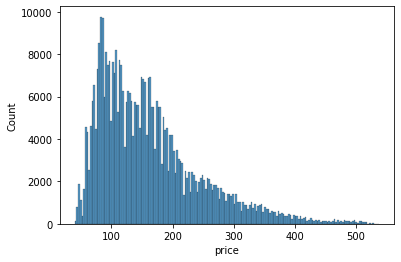

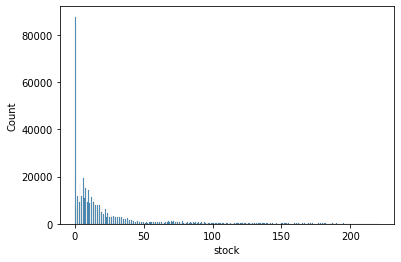

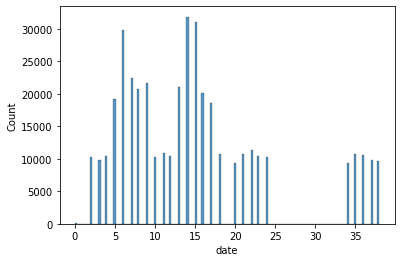

In [ ]:
for h in list_continuous_features:
    sns.histplot(data=data[list_continuous_features],x=data[h])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


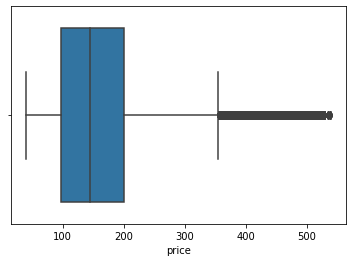

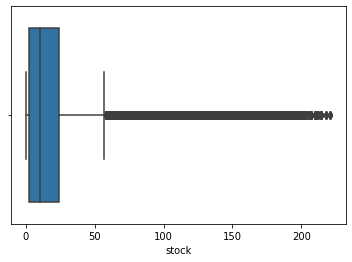

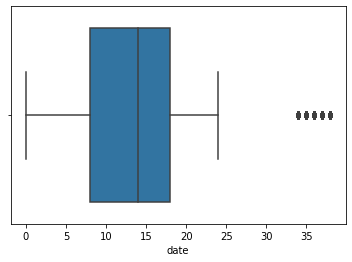

In [ ]:
plt.figure()
sns.boxplot(data['price'])
plt.figure()
sns.boxplot(data['stock'])
plt.figure()
sns.boxplot(data['date'])
plt.show()

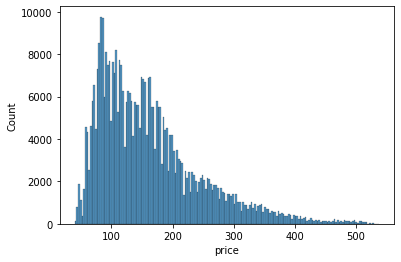

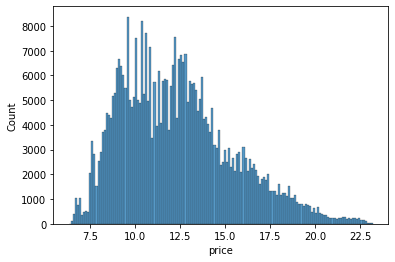

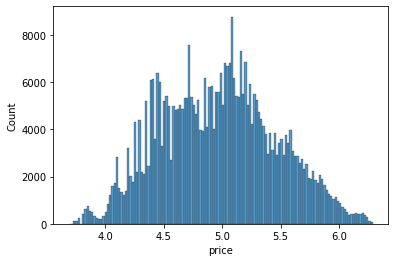

In [ ]:
plt.figure()
sns.histplot(data["price"])
plt.figure()
sns.histplot(np.sqrt(data["price"]))
plt.figure()
sns.histplot(np.log(data["price"]+0.001))

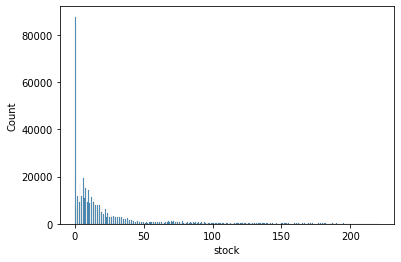

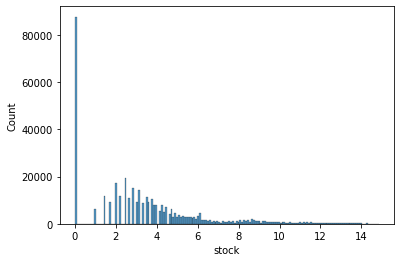

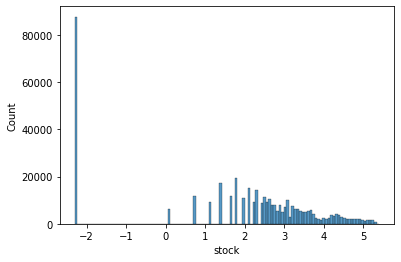

In [ ]:
plt.figure()
sns.histplot(data["stock"])
plt.figure()
sns.histplot(np.sqrt(data["stock"]))
plt.figure()
sns.histplot(np.log(data["stock"]+0.1))

In [ ]:
data_transfo = data.copy()
data_transfo["price"] = np.log(data["price"]+0.001)
data_transfo["stock"] = np.log(data["stock"]+0.1)

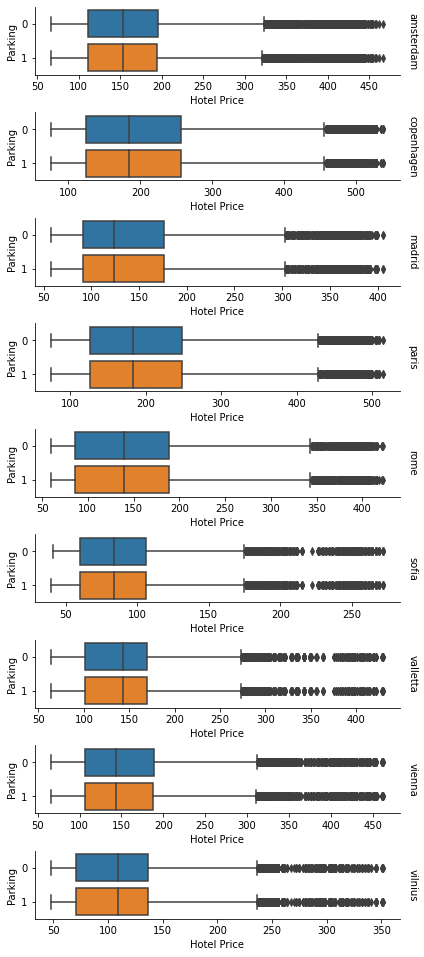

In [ ]:
g = sns.catplot(
    data=data,
    x="price", y="mobile", row="city",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Hotel Price", ylabel="Parking")
g.set_titles(row_template="{row_name}")

**Analyse multi-dimensionnelle**

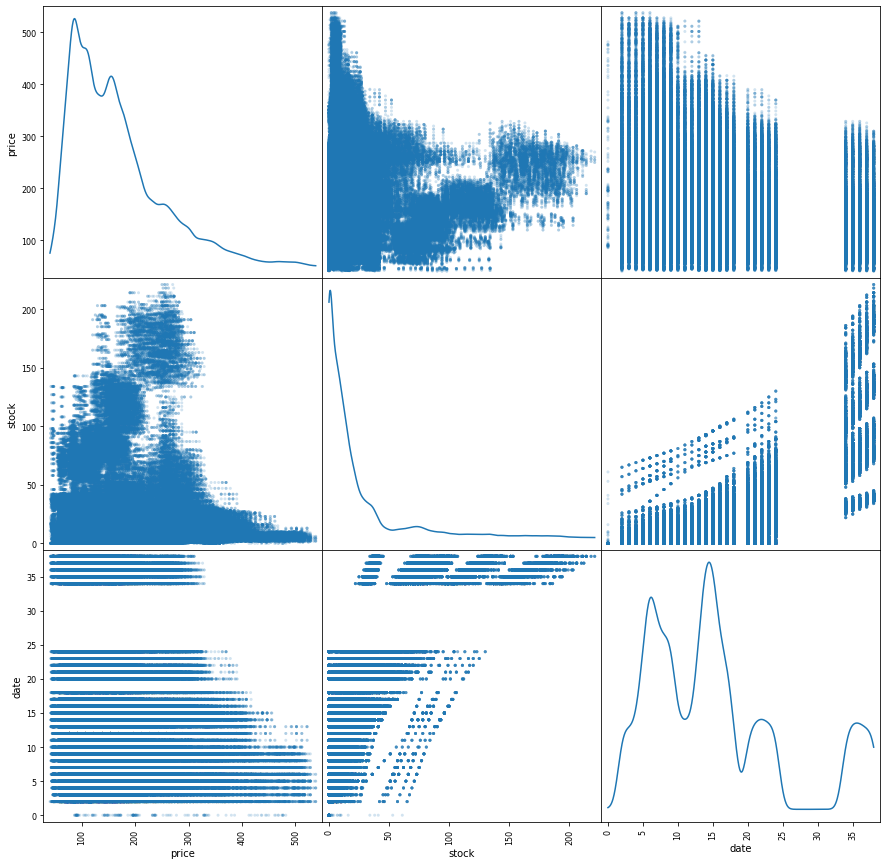

In [ ]:
liste= ['price', 'stock', 'date']
scatter_matrix(data[liste], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

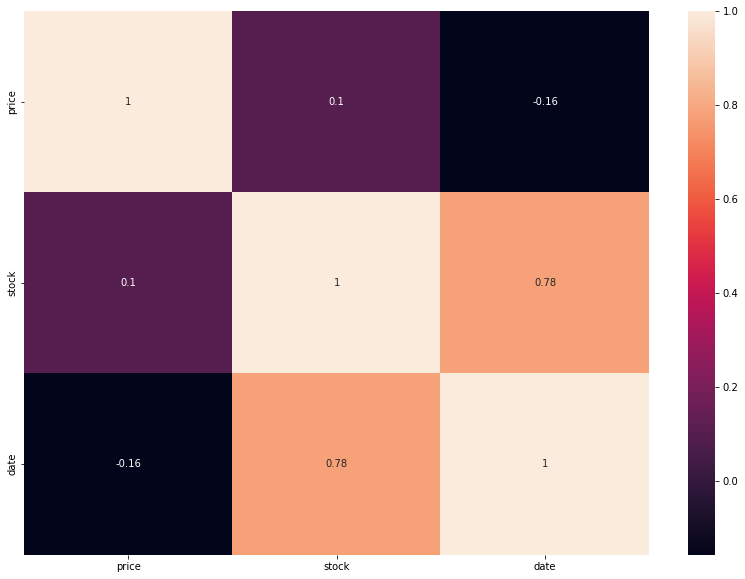

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(data[liste].corr(), annot=True)

**Multiple Factorial Analysis (MFA)**

In [ ]:
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import prince

mfa = prince.MFA(groups = data['city'])
mfa = mfa.fit(data)

KeyError: ignored

In [ ]:
# réduction des variables
X=scale(data[liste])
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)    

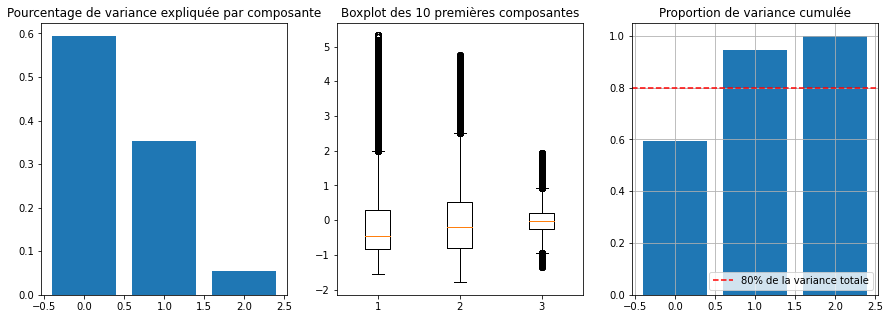

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.bar(range(3),pca.explained_variance_ratio_)
plt.title("Pourcentage de variance expliquée par composante")
plt.subplot(1,3,2)
plt.boxplot(C)
plt.title("Boxplot des 10 premières composantes")
plt.subplot(1,3,3)
plt.bar(range(3),np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.80, ls ='--', color='red',label="80% de la variance totale")
plt.title("Proportion de variance cumulée")
plt.legend(loc='lower right')
plt.grid()
plt.show()

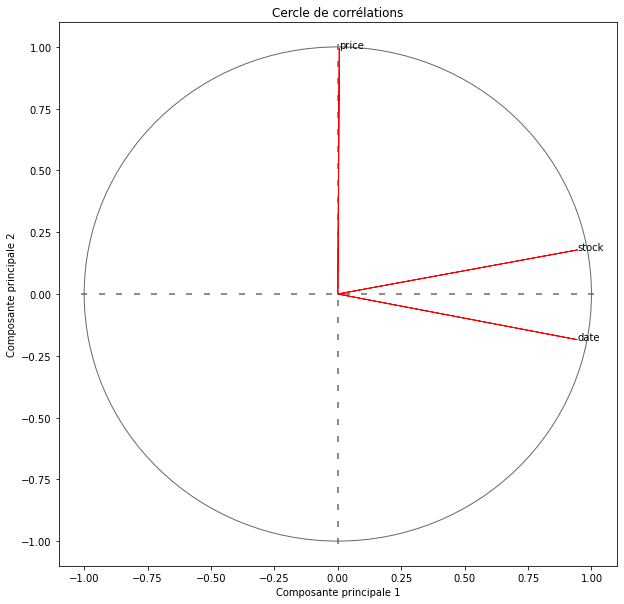

In [ ]:
data_quanti = data[liste]

coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
for i, j, nom in zip(coord1, coord2, data_quanti.columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, width = 0.0001, color="red")
ax.add_patch(plt.Circle((0,0), radius=1, color='dimgray', fill=False))
x=np.linspace(start=-1,stop=1,num=30)
plt.scatter(x,[0]*len(x), marker='_',color='dimgray')
plt.scatter([0]*len(x), x, marker='|',color='dimgray')
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Cercle de corrélations")
plt.show()

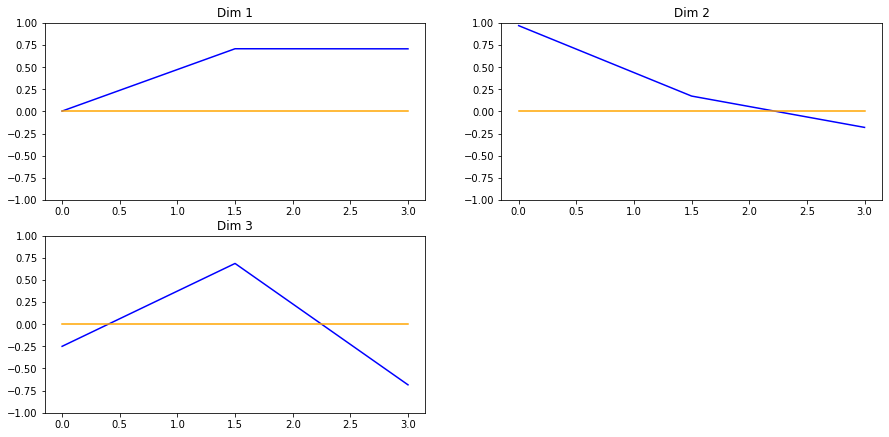

In [ ]:
fig = plt.figure(1, figsize = (15, 15))

x = np.linspace(0, 3, 3)

#Affichage des 3 barycentres
for i in range(0, 3):
    fig.add_subplot(4, 2, i+1)
    plt.ylim((-1, 1))
    plt.plot(x, pca.components_[i], color='blue')
    plt.plot(x, [0] * len(x), color='orange')
    plt.title("Dim %i" %(i+1))
    #plt.xlabel("Time")
plt.show()

### **Extraction échantillons apprentissage**

In [ ]:
dataTrain = data_transfo[['city','language','mobile','stock','date','hotel_id']]
dataTrain.head()

Yreg = data_transfo['price']

X_train,X_test,Y_train,Y_test=train_test_split(dataTrain,Yreg,test_size=0.2,random_state=11)

mean_ytrain = np.mean(Y_train)
sd_ytrain = np.std(Y_train)
Y_train = (Y_train - mean_ytrain)/sd_ytrain

mean_ytest = np.mean(Y_test)
sd_ytest = np.std(Y_test)
Y_test = (Y_test - mean_ytest)/sd_ytest



scaler = StandardScaler()  
scaler.fit(X_train[['stock']])  
X_train[['stock']] = scaler.transform(X_train[['stock']])
# Meme transformation sur le test
X_test[['stock']] = scaler.transform(X_test[['stock']])

#Yreg = np.reshape(Yreg.values,(-1,1))
#Yreg = scaler.transform(Yreg)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

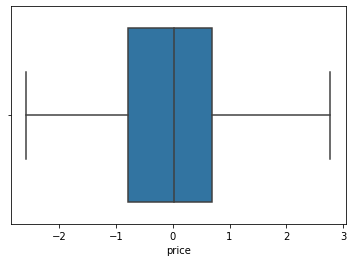

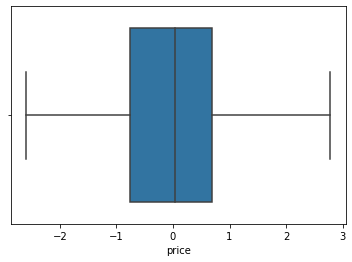

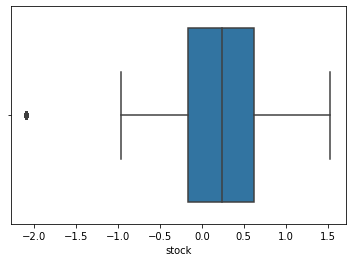

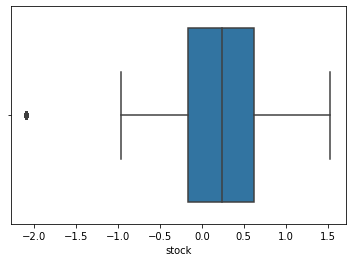

In [ ]:
plt.figure()
sns.boxplot(Y_train)
plt.figure()
sns.boxplot(Y_test)
plt.figure()
sns.boxplot(X_train['stock'])
plt.figure()
sns.boxplot(X_test['stock'])

**Régression avec régularisation Lasso**

In [ ]:
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=10,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 943, in fit
    y_numeric=True,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.7/dist-packages/sklear

ValueError: ignored

In [ ]:
prev=regLassOpt.predict(X_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 0.9213895418010837
R2= 0.07861045819891632


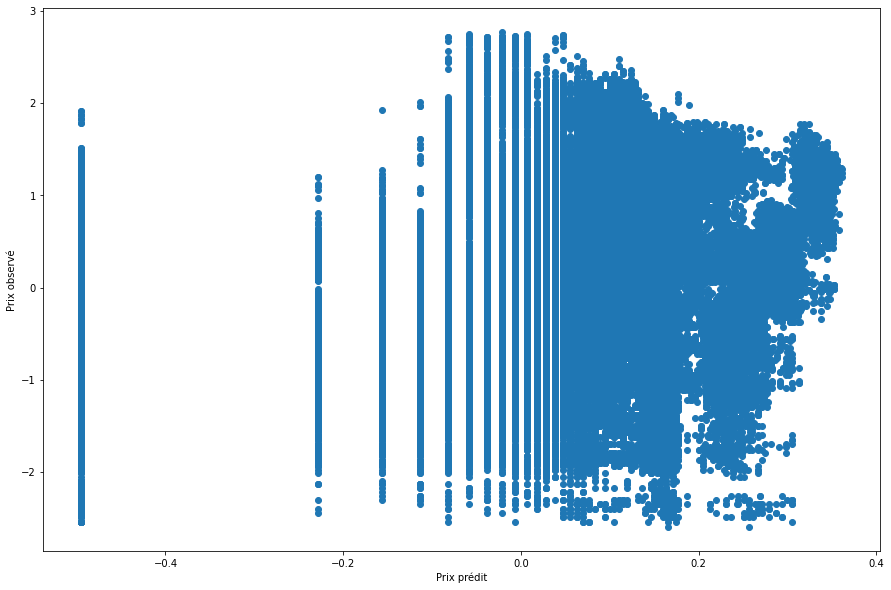

In [ ]:
#mean_ytest = np.mea
#Y_test = ()

plt.figure(figsize=(15,10))
plt.plot(prev,Y_test,"o")
plt.xlabel("Prix prédit")
plt.ylabel("Prix observé")
plt.show()

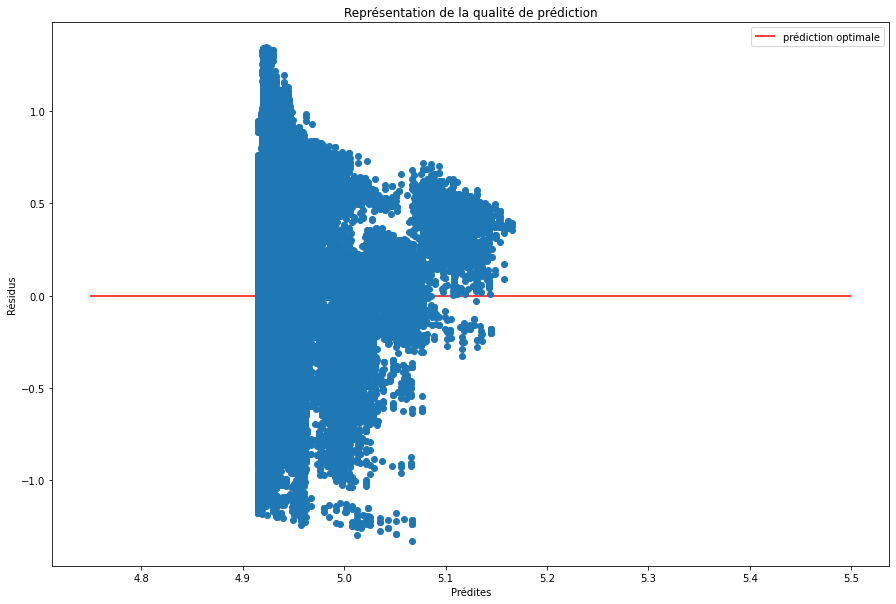

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(prev,Y_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,4.75,5.5,colors='r',label="prédiction optimale") 
plt.title("Représentation de la qualité de prédiction")
plt.legend()
plt.show()

In [ ]:
Yreg = data["price"]
X_train,X_test,Y_train,Y_test=train_test_split(data[["date","stock"]],Yreg,test_size=0.25,random_state=11)

scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

In [ ]:
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=10,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Y_train)

In [ ]:
prev=regLassOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(prev,Y_test,"o")
plt.xlabel("Prix prédit")
plt.ylabel("Prix observé")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(prev,Y_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,0,350,colors='r',label="prédiction optimale") 
plt.title("Représentation de la qualité de prédiction")
plt.legend()
plt.show()

### **Random Forest**

In [16]:
liste= ['stock', 'date','order_request']
dataDum=pd.get_dummies(data[["city","language","group","brand","children_policy"]]) 
dataQuant = data[liste]
data_dum = pd.concat([dataDum,dataQuant],axis=1)
display(data_dum)

,city_amsterdam,city_copenhagen,city_madrid,city_paris,city_rome,city_sofia,city_valletta,city_vienna,city_vilnius,language_austrian,...,brand_Quadrupletree,brand_Royal Lotus,brand_Safitel,brand_Tripletree,children_policy_0,children_policy_1,children_policy_2,stock,date,order_request
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,84,35,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,94,37,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,84,35,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,76,34,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,89,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412218,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,2,4,4
412219,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,2,4,4
412220,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,5,6,4
412221,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,2,4


In [17]:
print(np.sum(data_dum['order_request'] == 1))
print(np.sum(data_dum['order_request'] == 2))
print(np.sum(data_dum['order_request'] == 3))
print(np.sum(data_dum['order_request'] == 4))
print(np.sum(data_dum['order_request'] == 5))

100939
104714
103521
102894
155


In [18]:

# scaler = StandardScaler()  
# scaler.fit(np.array(np.log(data_dum['stock']+0.001)).reshape(-1,1))
# stock = scaler.transform(data_dum['stock'])
mean_stock = np.mean(np.array(np.log(data_dum['stock']+0.001)))
std_stock = np.std(np.array(np.log(data_dum['stock']+0.001)))
data_dum.stock = (np.array(np.log(data_dum['stock']+0.001))- mean_stock)/std_stock
display(data_dum)


X_train =data_dum.copy()
Y_train = np.log(data["price"]+0.001)

,city_amsterdam,city_copenhagen,city_madrid,city_paris,city_rome,city_sofia,city_valletta,city_vienna,city_vilnius,language_austrian,...,brand_Quadrupletree,brand_Royal Lotus,brand_Safitel,brand_Tripletree,children_policy_0,children_policy_1,children_policy_2,stock,date,order_request
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.931129,35,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.958868,37,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.931129,35,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.906446,34,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.945388,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412218,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0.009455,4,4
412219,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0.009455,4,4
412220,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0.235359,6,4
412221,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,-1.865223,2,4


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from time import perf_counter

tps0=perf_counter()
param=[{"n_estimators":[200, 250, 300]}]
gbm= GridSearchCV(GradientBoostingRegressor(),param,cv=10)
gbmOpt=gbm.fit(X_train, Y_train)

# paramètre optimal
tps1=(perf_counter()-tps0)

KeyboardInterrupt: ignored

In [ ]:
prediction = gbmopt.predict(X_test)

In [ ]:
param = [{"n_estimators":list(range(100,1000,10)),"max_features":list(range(2,3,1)) }]
n_features = np.shape(Xr_train)[0]
rf = GridSearchCV(RandomForestRegressor(),
        param,cv=10,n_jobs=-1)
rfOpt = rf.fit(Xr_train, Y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
#Calcul de la valeur absolue des erreurs
predictions = rfOpt.predict(Xr_test)
print("MSE=",mean_squared_error(predictions,Y_test))
print("R2=",r2_score(Y_test,predictions))

In [ ]:
x = np.linspace(1,np.shape(Y_test)[0],np.shape(Y_test)[0])
plt.scatter(x,Y_test,s=10,label='actual')
plt.scatter(x,predictions,s=10,c='red',label='predictions')
plt.legend()